In [84]:
from pymatgen.ext.matproj import MPRester 
from pymatgen import Structure 
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [85]:
# Téléchargement de la structure de bande électronique du cristal TiCoSb
with MPRester(api_key='nTQqrVPUX1GFrAOLnWc2') as mpr:
    bs = mpr.get_bandstructure_by_material_id('mp-5967')

# Bande interdite

Bande interdite:
Gap direct = False,
Energie = 1.0431999999999997 eV,
Vecteur de transition = \Gamma-X


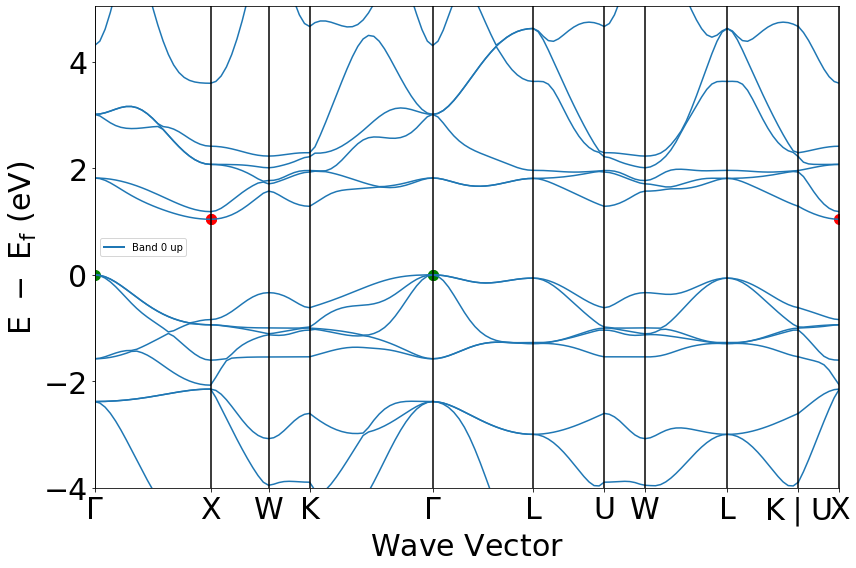

In [86]:
# Création d'un objet BSPlotter pour la structure de bandes
bsplot = BSPlotter(bs)
bsplot.get_plot(vbm_cbm_marker=True)

# Affichage de la bande interdite
print("Bande interdite:")
print("Gap direct = {},\nEnergie = {} eV,\nVecteur de transition = {}".format(bs.get_band_gap()["direct"], bs.get_band_gap()["energy"], bs.get_band_gap()["transition"]))

On observe que le cristal possède une bande interdite indirecte qui a une énergie de 1.0431999999999997 eV. Le matériau est donc un semi-conducteur car cette énergie est proche de 1 eV. 

La bande est bien indirecte car on observe sur le graphe de la structure des bandes électroniques ci-dessus que les extremums de la bande de conduction (en rouge) et de valence (en vert) ne correspondent pas au même quasi-moment. La transition se fait du kpoint  Γ au kpoint X.

# Dispersion 

La matière est un milieu dispersif: la vitesse de propagation des ondes dépend de la fréquence de l'onde. La dispersion dépend donc de la variation d'énergie du vecteur d'onde k. 
Pour trouver les directions de dispersion maximale et minimale des bandes de valence et de conduction, nous allons déterminer les pentes maximales et minimales de chaque branche pour ces bandes. 

Dernière bande de valence : defaultdict(<class 'list'>, {<Spin.up: 1>: [9, 10, 11]})
Première bande de conduction : defaultdict(<class 'list'>, {<Spin.up: 1>: [12]})

La dispersion maximale dans la bande de valence correspond à la pente de  0.9501830660919839 dans la direction X-W.
Elle est représentée par la flèche rouge sur le graphe.
La dispersion minimale dans la bande de valence correspond à la pente de  0.06682706278881888 dans la direction Γ-L.
Elle est représenté par la flèche bleue sur le graphe.
 
La dispersion maximale dans la bande de conduction correspond à la pente de  0.9923925803803739 dans la direction X-W.
Elle est représentée par la flèche verte sur le graphe.
La dispersion minimale dans la bande de conduction correspond à la pente de  0.008123224812255428 dans la direction Γ-L.
Elle est représenté par la flèche jaune sur le graphe.
 
Structures des bandes électroniques avec les directions de dispersion maximale et minimale indiquées par des flèches:


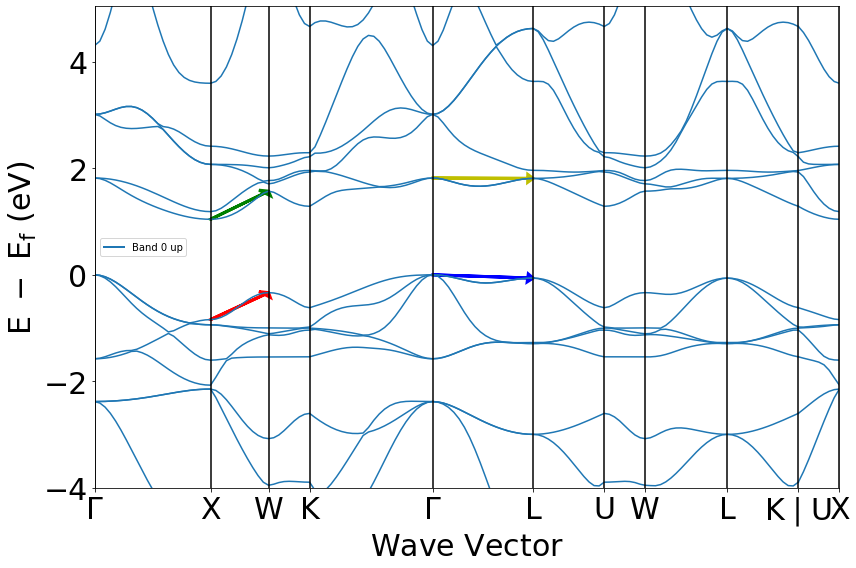

In [91]:
# Calcul de la direction de dispersion maximale et minimale pour la dernière (première) bande de valence (conduction)

data = bsplot.bs_plot_data()
pl = bsplot.get_plot()
E = data.get('energy').get('1')
D = data.get('ticks').get('distance')

# Recherche de la dernière (première) bande de valence (conduction)
last_vbm = bs.get_vbm()
first_cbm = bs.get_cbm()

# Affichage des indices de bande pour la dernière (première) bande de valence (conduction)
print("Dernière bande de valence : {}".format(last_vbm["band_index"]))
print("Première bande de conduction : {}\n".format(first_cbm["band_index"]))

v_index = 11
c_index = 12

slope_v = np.zeros(10)
slope_c = np.zeros(10)
Dbranch = np.unique(D)   #Efface les redondances
for i in range(10):
    DeltaD = Dbranch[i+1] - Dbranch[i]
    slope_v[i] = abs(((E[i][v_index])[-1] - (E[i][v_index])[0])/(DeltaD))
    slope_c[i] = abs(((E[i][c_index])[-1] - (E[i][c_index])[0])/(DeltaD))

max_v = np.argmax(slope_v) 
min_v = np.argmin(slope_v) 

print("La dispersion maximale dans la bande de valence correspond à la pente de ",np.max(slope_v),"dans la direction X-W.")
print("Elle est représentée par la flèche rouge sur le graphe.")
print("La dispersion minimale dans la bande de valence correspond à la pente de ",np.min(slope_v),"dans la direction Γ-L.")
print("Elle est représenté par la flèche bleue sur le graphe.")
print(" ")

max_c = np.argmax(slope_c) 
min_c = np.argmin(slope_c) 

print("La dispersion maximale dans la bande de conduction correspond à la pente de ",np.max(slope_c),"dans la direction X-W.")
print("Elle est représentée par la flèche verte sur le graphe.")
print("La dispersion minimale dans la bande de conduction correspond à la pente de ",np.min(slope_c),"dans la direction Γ-L.")
print("Elle est représenté par la flèche jaune sur le graphe.")
print(" ")

plt.arrow(Dbranch[max_v], (E[max_v][v_index])[0], Dbranch[max_v+1] - Dbranch[max_v], (E[max_v][v_index])[-1] - (E[max_v][v_index])[0], head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
plt.arrow(Dbranch[min_v], (E[min_v][v_index])[0], Dbranch[min_v+1] - Dbranch[min_v], (E[min_v][v_index])[-1] - (E[min_v][v_index])[0], head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)
plt.arrow(Dbranch[max_c], (E[max_c][c_index])[0], Dbranch[max_c+1] - Dbranch[max_c], (E[max_c][c_index])[-1] - (E[max_c][c_index])[0], head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
plt.arrow(Dbranch[min_c], (E[min_c][c_index])[0], Dbranch[min_c+1] - Dbranch[min_c], (E[min_c][c_index])[-1] - (E[min_c][c_index])[0], head_width=0.15, head_length=0.05, linewidth=3, color='y', length_includes_head=True)

print("Structures des bandes électroniques avec les directions de dispersion maximale et minimale indiquées par des flèches:")
plt.show()

# Masse effective  

Nous allons calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique. La masse effective est alors calculée grâce à la formule suivante: 

$$ m^{*} = \frac{\hbar^{2} \cdot k^{2}}{2 \cdot E(k)} = \frac{\hbar^{2} \cdot (k_{x}^{2}+k_{y}^{2}+k_{z}^{2})}{2 \cdot E(k)}$$

où E(k) est l'énergie d'un électron de vecteur d'onde k dans la bande considérée. 

In [93]:
hbar = 1.054571817e-34  #J.s 

#2*pi/(vecteur a de la maille conventionnelle)  
a = [ 1.07221592e+00,  0.00000000e+00,  0.00000000e+00] #angstrom^(-1)

#Calcul des composantes du vecteur d'onde k 
v_kpoint = np.linalg.norm(last_vbm['kpoint'].cart_coords + a)*1e10   #mètres^(-1)
c_kpoint = np.linalg.norm(first_cbm['kpoint'].cart_coords + a)*1e10  #mètres^(-1)

#Energies des bandes de valence et de conduction
E_vbm = last_vbm['energy'] * 1.602177e-19    #J
E_cbm = first_cbm['energy'] * 1.602177e-19   #J

# Calcul des masses effectives en supposant une dispersion parabolique
m_vbm = (hbar**2 * v_kpoint**2)/(2*E_vbm)   #kg
m_cbm = (hbar**2 * c_kpoint**2)/(2*E_cbm)   #kg


print("Masse effective au sommet de la dernière bande de valence : {} kg".format(m_vbm))
print("Masse effective à la base de la première bande de conduction : {} kg".format(m_cbm))
print("En supposant une dispersion parabolique dans les deux cas.")

Masse effective au sommet de la dernière bande de valence : 5.495684203926711e-31 kg
Masse effective à la base de la première bande de conduction : 9.555911751258927e-31 kg
En supposant une dispersion parabolique dans les deux cas.
